In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

In [10]:
# Add the working directory to the path to import local modules
sys.path.insert(0, os.getcwd())
# Import MY Logistic Regression Model
import myLogisticRegression

The following `make_classification` method is used to generate an example data set with 2 classes and 2 informative features in the data set.

In [15]:
X, y = make_classification(n_samples=100,
                          n_informative=2,
                          n_redundant=0,
                          n_features=2, 
                          n_classes=2,
                          random_state=3)
# Scale y values to -1 and 1
y = y*2 - 1

In [16]:
lambda_ = 1
my_model = myLogisticRegression.LogisticRegression(lambda_)
my_model.fit(X, y)
my_model.coef_

array([0.02239192, 0.17270548])

In [17]:
my_modelCV = myLogisticRegression.LogisticRegressionCV()
my_modelCV.fit(X, y)
my_modelCV.coef_
my_modelCV.lambda_

array([0.64914209, 2.40771903])

0.0001

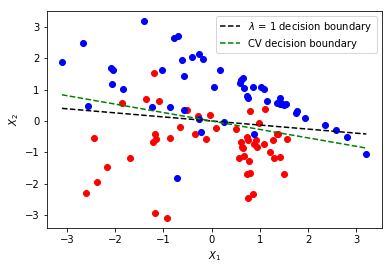

In [18]:
# Plot the X data colored by y
X_0 = X[y == -1]
X_1 = X[y == 1]
ax = plt.gca()
_ = plt.plot(X_0[:,0], X_0[:,1], color = 'r', marker='o', linestyle='None')
_ = plt.plot(X_1[:,0], X_1[:,1], color = 'b', marker='o', linestyle='None')
xax_lims, yax_lims = ax.get_xlim(), ax.get_xlim()

# Plot the decision boundary for lambda = 1
x_decision = np.array([np.min(X[:,0]), np.max(X[:,0])])
y_decision = -(x_decision * my_model.coef_[0])/my_model.coef_[1]
_ = plt.plot(x_decision, y_decision, linestyle='--', c='black', label = r'$\lambda$ = 1 decision boundary')
# Plot the decision boundary for cross-validation model
y_decisionCV = -(x_decision * my_modelCV.coef_[0])/my_modelCV.coef_[1]
_ = plt.plot(x_decision, y_decisionCV, linestyle='--', c='green', label = 'CV decision boundary')
_ = plt.xlabel(r'$X_1$')
_ = plt.ylabel(r'$X_2$')
_ = plt.legend()
_ = plt.xlim(xax_lims)
_ = plt.ylim(yax_lims)

In the above plot of the comparison between the decision boundaries with $\lambda = 1$ and the cross-validation model, it can be seen that the CV model captures 1 additional point correctly.

In [7]:
my_model.score(X, y)
my_modelCV.score(X, y)

0.97

0.98

The model score is 97% and 98% for the $\lambda = 1$ and the cross-validation model, respectively. This can be seen in the above plot, where 3 and 2 of 100 points fall on the wrong side of the decision boundaries.

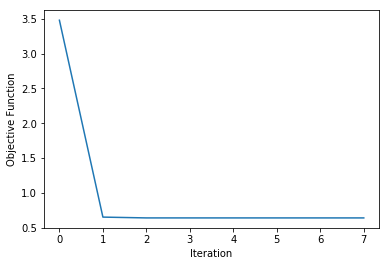

In [8]:
_ = my_model.plot_learning(X, y)

The model converges within only a few iterations for this data set.